
# Ex | Nonlinearity {.unnumbered}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In this exercise, we will investigate the questions when feedback and overshoot lead to prolonged oscillations and when they do not.

## Model 1 | Human-Nature interactions

In the lecture, we asked the question, whether the osscilations we observed in the interaction model between human economic captial ($y$) and natural capital ($x$),

\begin{align}
x_{t+1} &= x_t - a y_t \\
y_{t+1} &= y_t + b x_t
\end{align}

are due to a special set of parameters ($a$ and $b$), or whether they are a general feature of the system's structure.

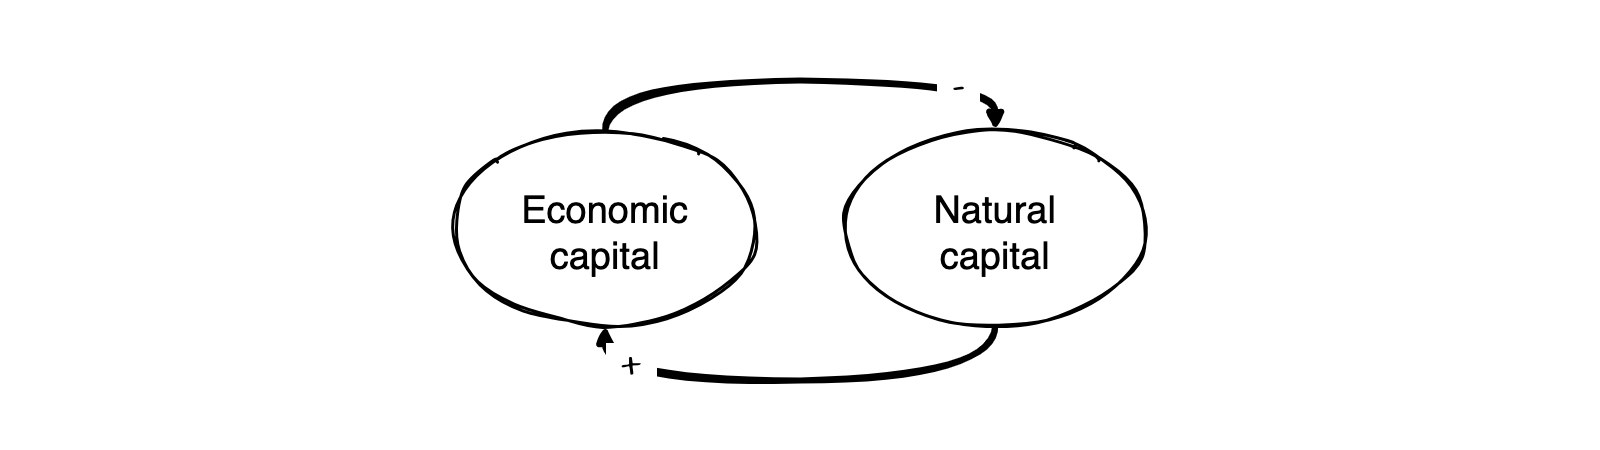

Now, you will use Python's `sympy` library to investigate this question. `sympy` is a powerful library for symbolic mathematics. It allows you to define variables and equations symbolically, and then solve these equations symbolically. This is very useful for investigating the properties of mathematical models.

In [ ]:
import sympy as sp

First, we define the symbols for the variables in the model:

In [ ]:
x, y, a, b = sp.symbols('x y a b')

#### Step 1: Coefficient matrix

Formulate a `sympy.Matrix` object `A` that represents the coefficient matrix of the system of equations, $\mathbf x_{t+1} = A \mathbf x_t$.

In [ ]:
# ...

#### Step 2: Calculate the eigenvalues of the matrix A

Now, calculate the eigenvalues of the matrix `A` using the `A.eigenvals()` method.

In [ ]:
# ...

#### Step 3: Interpret the results 

What do the eigenvalues tell you about the stability of the system? Are the oscillations in the system due to a special set of parameters, or are they a general feature of the system's structure? Write your answer in the markdown cell below.

...

As discussed in the lecture, the fact that economic and natural captial may enter negative values is not very intuitive. Therefore, we will now refine the model, turning it into a model with nonlinear changes.

## Model 2 | Lotka-Volterra equations

During this part, you will use Python to implement and investigate the Lotka-Volterra equations, also known as the predator-prey model. The predator-prey equations are an iconic model in population ecology, which describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. It is the foundation for many dynamic system models of human-enviornment interactions, where human societies are the predators and the natural environment the prey. The Easter Island model [@BranderTaylor1998] or the HANDY (human and nature dynamics) model [@MotesharreiEtAl2014] are prototypical examples of such models; [see also Section 2 of the review by @FarahbakhshEtAl2022].




In discrete time, the Lotka-Volterra equations read

\begin{align}
\Delta x &= x_{t+1} - x_t = \alpha x_t - \beta x_t y_t \\
\Delta y &= y_{t+1} - y_t = \delta x_t y_t - \gamma y_t
\end{align}

where, in our case, $x$ denotes the health of the natural environment and $y$ the level of development of a human society. 
The parameters $\alpha$, $\beta$, $\delta$, and $\gamma$ are positive constants that determine the dynamics of the system. The parameter $\alpha$ represents the natural growth rate of the environment, $\beta$ the rate at which the human society depletes the environment, $\delta$ the rate at which the human society grows by exploiting the environment, and $\gamma$ the natural decay rate of the human society.

#### Model 2 | The Lotka-Volterra equations

You will use the following set of parameters as default values:

In [ ]:
# Parameters
alpha = 0.1  # Growth rate of prey
beta = 0.02  # Rate at which predators destroy prey
gamma = 0.3  # Death rate of predators
delta = 0.01 # Rate at which predators increase by consuming prey

# Initial conditions
X = 40  # Initial prey population
Y = 9   # Initial predator population

#### Step 1 | Implement the model

Write a function called `lotkavolterra` that implements the update of the Lotka-Volterra equations. 

In [ ]:
# ...

Write (or copy-paste-and-adjust) an `iterate_model` function that iterates a dynamic systems model forward in time, given an initial state and a function (plus its parameters) that updates the state.

In [ ]:
# ...

Write (or copy-paste-and-adjust) a `plot_stock_evolution` function that plots the time series of the state variables. Label the two-dimensional output of our system as "Natural environment" and "Human society".

In [ ]:
# ...

#### Step 2 | Plot the time series

Visualize the time series of the natural environment and the human society for the default parameter values for 100 time steps.

In [ ]:
# ...

You should observe oscillations in the time series of the natural environment and the human society. Crucially, natural environment and human socitey values (almost) never become negative.

Optional | Feel free to interact with the time series plot using the `interact` function.

In [ ]:
# ...

#### Step 3 | Visualize the dynamics in the phase space

Adjust the `plot_flow` function from the lecture material to visualize the dynamics of the system in the phase space. The updated `plot_flow` function should take the following arguments (and default values): 

* `update_func`: the function that updates the state of the system
* `xextent=10`: the x-axis extent of the phase space plot
* `yextent=10`: the y-axis extent of the phase space plot
* `nr_points=11`: the number of points in the phase space plot
* `ax=None`: the axis object to plot on
* `**update_params`: additional keyword arguments for the `update_func`


In [ ]:
# ...

Visualize the dynamics of the Lotka-Volterra equations in the phase space for the default parameter values and an `xextent` of 70.

In [ ]:
# ...

Now, adjust the `plot_flow_trajectory` function from the lecture material to visualize the trajectory of the system in the phase space next to the time series plot.  The updated `plot_flow_trajectory` function should take the following arguments (and default values):

* `nr_timesteps`: the number of time steps to simulate
* `initial_value`: the initial value of the state variables
* `update_func`: the function that updates the state of the system
* `xextent=10`: the x-axis extent of the phase space plot
* `yextent=10`: the y-axis extent of the phase space plot
* `nr_points=11`: the number of points in the phase space plot
* `**update_params`: additional keyword arguments for the `update_func`

In [ ]:
# ...

Visualize a trajectory from the initial values ($x_0 = 28, y_0=5$) of the system in the phase space next to the time series plot for the default parameter values and 250 time steps. The `xextent` should be 70.

In [ ]:
# ...

You should observe that the system diverges with ossiclations around an equilibrium point that are more complex than simple sin and cosin fuctions.

Optional | Feel free to interact with plot using the `interact` function.

In [ ]:
# ...

But where exactly are the equilibirum points of the system?

#### Step 4 | Equilibrium points

Calculate the analytical solutions for the equilibrium points $x_e$ of the Lotka-Volterra system, i.e., how $x_e$ and $y_e$ depend on the parameters $\alpha$, $\beta$, $\delta$, and $\gamma$.

You can do this either by hand or using the `sympy` library.

In [ ]:
# ...

You should have found two equilibrium points. Include both in the visualization of the phase space trajectory from the initial values ($x_0 = 28, y_0=5$) for the default parameter values and 250 time steps. The `xextent` should be 70.

In [ ]:
# ...

#### Step 5 | Derive the Jacobian matrix
The Jacobian matrix of the descrete-time system ($\mathbf x_{t+1} = F(\mathbf x_t)$) is the multidimensional version of the derivative. It is a matrix of all first-order partial derivatives of a vector-valued function. The Jacobian matrix of a two-dimensional system is given by

\begin{equation}
J = \begin{bmatrix}
\frac{\partial F_x}{\partial x} & \frac{\partial F_x}{\partial y} \\
\frac{\partial F_y}{\partial x} & \frac{\partial F_y}{\partial y}
\end{bmatrix},
\end{equation}

where $F_x$ and $F_y$ are the two functions that describe the dynamics of the $x$ and $y$ component of the system.

You can do this either by hand or using the `sympy` library.

...

\begin{equation}
J = \begin{bmatrix}
 1+\alpha -\beta y & - \beta x \\
\delta y & 1 + \delta x - \gamma
\end{bmatrix}.
\end{equation}

#### Step 6 | Eigenvalues at the equilibrium points

 Compute the eigenvalues of the Jacobian matrix at the two equilibrium points using the symbolic mathematics library `sympy`.

In [ ]:
# ...

Similarly as in the first model, you should observe that for positive parameter values, you always have to take the square root of a negative number, leading to complex numbers which indicates that the system oscillates around the equilibrium points. 

In the basic Lotka-Volterra model, the natural environment would grow indefinitely without human society, which is not very realistic. Therefore, we will now refine the model, make the growth of the natural environment logistic.

## Model 3 | Extended Lotka-Volterra model [Optional]

Although Model 3 is optional, I highly recommend that you work through it, as it reinforces your understanding of the concepts introduced in the lecture and applied above. In Model 3, we extent the Lotka-Volerra model such that the natural environment has a finite carrying capacity $C$ and its natural growth follows the logistic map,

\begin{align}
\Delta x &= x_{t+1} - x_t = \alpha x_t (1 - \frac{x_t}{C}) - \beta x_t y_t, \\
\Delta y &= y_{t+1} - y_t = \delta x_t y_t - \gamma y_t.
\end{align}

All other parameters remain the same.

#### Step 1 | Implement the model

Write a function called `lotkavolterraX` that implements the update of the extended Lotka-Volterra equations. 

In [ ]:
# ...

#### Step 2 | Visualize the dynamics in the phase space

For the default parameters and a carrying capacity of $C=40$, visualize a trajectory of the dynamics of the extended Lotka-Volterra equations in the phase space, using the `plot_flow_trajectory` function from above. The initial values should be $x_0 = 40$ and $y_0=0.001$, representing a natural environment in equilibirum and a human society that is just starting to grow. Simulate the system for 250 time steps. Set the `xextent` to 50, and the `yextent` to 3.

In [ ]:
# ...

Briefly describe and interpret the dynamics you observe in the markdown cell below.

...

Last, plot the evolution of the human society trajectory alone. What do you observe?

In [ ]:
# ...

#### Step 3 | Eigenvalues at the equilibrium points

Use `sympy` to calculate the eigenvalues at the equilibirum points. What do they tell about the stability of the system?

In [ ]:
# ...